# Linear Regression

🎯 In this exercise, you will model the sale price of houses (`SalePrice`) according to their living areas (`GrLivArea`) 

👇 Load the `houses.csv` dataset into this notebook as a pandas dataframe, and display its first 5 rows.

<details>
    <summary>💡 Hint</summary>
    The dataset is located in a parent directory, you should use <code>../</code> in order to find it.
</details>

In [0]:
import pandas as pd

df = pd.read_csv('../data/houses.csv')

df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


ℹ️ You can download a detailed description of the dataset [here](https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Houses_dataset_description.txt). Make sure to refer to it throughout the day.

## 1. Define the feature set and target

🎯 The objective is to model the sale price of houses in \$ (`SalePrice`) according to their living areas in $ft^2$ (`GrLivArea`).

👇 Assign those two variables to X and y. Remember that X is the feature(s), and y the target.

In [0]:
X = df[['GrLivArea']]
y = df['SalePrice']

👇 In a scatter plot ([doc](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.scatter.html)) , visualize the relationship between the living areas and the sale prices.

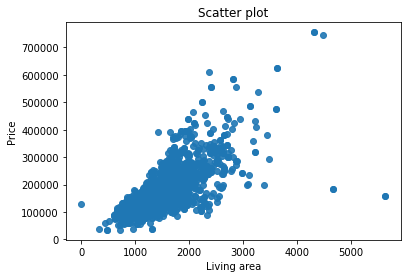

In [0]:
import matplotlib.pyplot as plt

# Plot!
plt.scatter(X, y, alpha=0.9)
plt.title('Scatter plot')
plt.xlabel('Living area')
plt.ylabel('Price')
plt.show()

ℹ️ The scatter plot should hint at the somewhat linear relationship.

### ☑️ Test your code

In [0]:
from nbresult import ChallengeResult

result = ChallengeResult('variables',
                         variable_X = round(X.mean()).item(),
                         variable_y = round(y.mean())
)

result.write()
print(result.check())

============================= test session starts ==============================
platform darwin -- Python 3.7.7, pytest-5.4.3, py-1.9.0, pluggy-0.13.1 -- /Users/chriswesterman/.pyenv/versions/3.7.7/envs/lewagon/bin/python3.7
cachedir: .pytest_cache
rootdir: /Users/chriswesterman/code/cjw21889/le-wagon/lw-data-solutions/05-ML/01-Fundamentals-of-Machine-Learning/01-Linear-Regression
plugins: anyio-2.2.0
collecting ... collected 2 items

tests/test_variables.py::TestVariables::test_variable_X PASSED           [ 50%]
tests/test_variables.py::TestVariables::test_variable_y PASSED           [100%]

============================== 2 passed in 0.09s ===============================


💯 You can commit your code:

git add tests/variables.pickle

git commit -m 'Completed variables step'

git push origin master


## 2. Cross-validation

👇 Using Sklearn's `cross_validate` ([doc](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html)), run a 5-fold cross validation on a `LinearRegression` ([doc](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)) model predicting sale price from living area. Save the raw output of the cross validation under a new variable `cv_results`.

In [0]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression

# Instanciate model
model = LinearRegression()

# 5-Fold Cross validate model
cv_results = cross_validate(model, X, y, cv=5)

❓ What is the lowest score of the cross validation? Compute your answer and save the value under new variable `min_score`.

In [0]:
# Min score
min_score = cv_results['test_score'].min()
min_score 

0.3911751008901019

❓ What is the highest score of the cross validation?  Compute your answer and save the value under new variable `max_score`.

In [0]:
# Max score
max_score = cv_results['test_score'].max()
max_score

0.5581065677255257

❓ What is the mean score of the cross validation? Compute your answer and save the value under new variable `mean_score`.

In [0]:
# Mean of scores
mean_score = cv_results['test_score'].mean()
mean_score

0.4863112208425962

ℹ️ When running a cross-validation, we always look at the mean score as the most robust and representative evaluation of the model's performance.

### ☑️ Test your code

In [0]:
from nbresult import ChallengeResult

result = ChallengeResult('cv_results',
                         cv_result = cv_results,
                         min_score = min_score,
                         max_score = max_score,
                         mean_score = mean_score
)

result.write()
print(result.check())

============================= test session starts ==============================
platform darwin -- Python 3.7.7, pytest-5.4.3, py-1.9.0, pluggy-0.13.1 -- /Users/chriswesterman/.pyenv/versions/3.7.7/envs/lewagon/bin/python3.7
cachedir: .pytest_cache
rootdir: /Users/chriswesterman/code/cjw21889/le-wagon/lw-data-solutions/05-ML/01-Fundamentals-of-Machine-Learning/01-Linear-Regression
plugins: anyio-2.2.0
collecting ... collected 4 items

tests/test_cv_results.py::TestCvResults::test_cv_max PASSED              [ 25%]
tests/test_cv_results.py::TestCvResults::test_cv_mean PASSED             [ 50%]
tests/test_cv_results.py::TestCvResults::test_cv_min PASSED              [ 75%]
tests/test_cv_results.py::TestCvResults::test_cv_results PASSED          [100%]

============================== 4 passed in 0.11s ===============================


💯 You can commit your code:

git add tests/cv_results.pickle

git commit -m 'Completed cv_results step'

git push origin master


👇 Plot the evolution of **total computational time** and **mean score** as Kfolds increases from 2 until 40.

In [0]:
K = []
total_time = []
score = []

for k in range(2,40):
    cross_val_results = cross_validate(model, X, y, cv=k)
    total_time.append(sum(cross_val_results['fit_time'])+sum(cross_val_results['score_time']))
    K.append(k)
    score.append(cross_val_results['test_score'].mean())

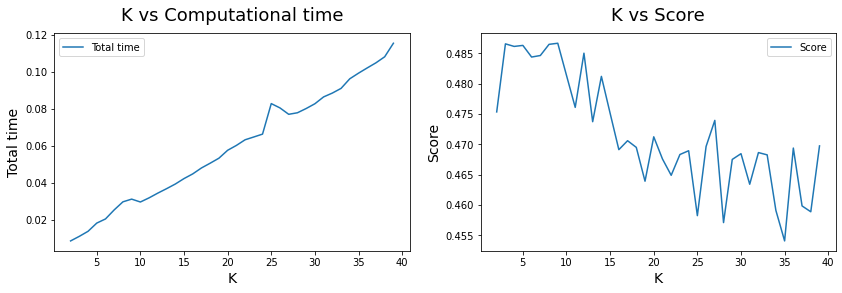

In [0]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
plt.plot(K, total_time, label = 'Total time')
plt.ylabel('Total time', fontsize = 14)
plt.xlabel('K', fontsize = 14)
plt.title('K vs Computational time', fontsize = 18, y = 1.03)
plt.legend()

plt.subplot(1,2,2)
plt.plot(K, score, label = 'Score')
plt.ylabel('Score', fontsize = 14)
plt.xlabel('K', fontsize = 14)
plt.title('K vs Score', fontsize = 18, y = 1.03)
plt.legend();

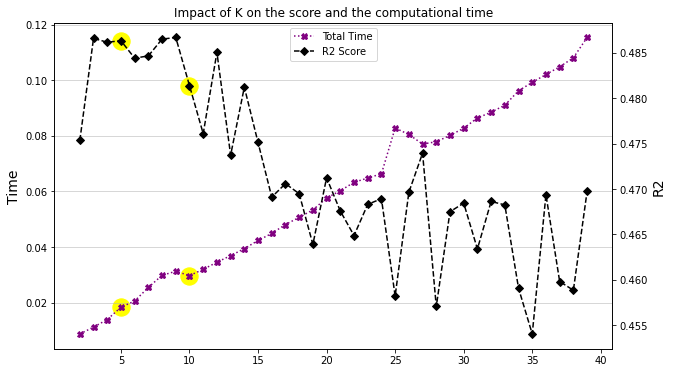

In [0]:
# Plotting like a pro
with plt.style.context('seaborn-deep'):
    # figsize
    plt.figure(figsize=(10,6))
    # getting axes
    ax1 = plt.gca()
    # duplicating the ax1
    ax2 = ax1.twinx()
    # plot time
    ax1.plot(K, total_time,color="purple",linestyle=":",marker="X",label="Total Time")
    # plotting with respect to the second axis
    ax2.plot(K, score,label="R2 Score",c="black",linestyle = "dashed",marker="D")
    # Get a conjoined legend
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc='upper center')
    # Highlighting results from K = 5 and K = 10
    ax1.scatter(5,total_time[5-2],c='yellow',s=300)
    ax1.scatter(10,total_time[10-2],c='yellow',s=300)
    ax2.scatter(5,score[5-2],c='yellow',s=300)
    ax2.scatter(10,score[10-2],c='yellow',s=300) 
    # additional styling
    ax1.grid(axis="y",linewidth=0.5)
    ax1.set_title('Impact of K on the score and the computational time')
    ax1.set_ylabel('Time', fontsize=14)
    ax2.set_ylabel('R2', fontsize=14)
    plt.show()


ℹ️ You will notice that while the score stabilizes, the computational time keeps increasing. For that reason, we do not exceed K = 10 as a rule of thumb.

## 3. Train the model

Cross validation does not train a model, it evaluates a hypothetical model on the dataset. If you want to use the model to, for example, make predictions, you will need to train it outside of the cross validation. 

👇 Go ahead and train the model. Save the trained model under the variable `model`.

In [0]:
# Instanciate the model
model = LinearRegression()

# Train the model on the Training data
model.fit(X, y)

LinearRegression()

❓ What is the slope of your trained model? It can be accessed via the model's attributes. Save the slope under variable name `slope`.

In [0]:
# Slope
slope = model.coef_
slope

array([105.00927564])

❓ What is the intercept of your trained model? It can be accessed via the model's attributes. Save the intercept under variable name `intercept`.

In [0]:
# Intercept
intercept = model.intercept_
intercept

22104.12101002081

### ☑️ Test your code

In [0]:
from nbresult import ChallengeResult

result = ChallengeResult('trained_model',
                         model = model,
                         slope = slope,
                         intercept = intercept
)

result.write()
print(result.check())

============================= test session starts ==============================
platform darwin -- Python 3.8.6, pytest-6.2.1, py-1.10.0, pluggy-0.13.1 -- /Users/krokrob/.pyenv/versions/3.8.6/envs/lewagon386/bin/python3.8
cachedir: .pytest_cache
rootdir: /Users/krokrob/code/lewagon/data-solutions/05-ML/01-Fundamentals-of-Machine-Learning/01-Linear-Regression
plugins: anyio-2.0.2
collecting ... collected 2 items

tests/test_trained_model.py::TestTrainedModel::test_intercept PASSED     [ 50%]
tests/test_trained_model.py::TestTrainedModel::test_slope PASSED         [100%]

============================== 2 passed in 0.54s ===============================


💯 You can commit your code:

git add tests/trained_model.pickle

git commit -m 'Completed trained_model step'

git push origin master


## 4. Visualize the model

👇 With matplotlib: 
- Define the line of best fit equation (using the slope and intercept values)
- Plot it in a graph over the scattered data points

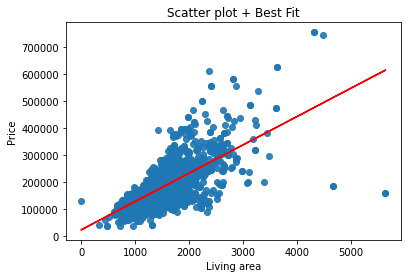

In [0]:
import matplotlib.pyplot as plt

# Defining the line of best fit equation
best_fit = slope * X + intercept

# Plot!
plt.scatter(X, y, alpha=0.9)
plt.plot(X, best_fit, c="red")
plt.title('Scatter plot + Best Fit')
plt.xlabel('Living area')
plt.ylabel('Price')
plt.show()

# 5. Predict

👇 Use your trained model to predict the sale price of a house with a living area of 1500 square feet. Save the predicted price as variable name `prediction`.

In [0]:
# Make prediction with model
prediction = model.predict([[1500]])[0]
prediction

179618.03446340322

### ☑️ Test your code

In [0]:
from nbresult import ChallengeResult

result = ChallengeResult('prediction',
                         prediction = prediction
)

result.write()
print(result.check())

============================= test session starts ==============================
platform darwin -- Python 3.8.6, pytest-6.2.1, py-1.10.0, pluggy-0.13.1 -- /Users/krokrob/.pyenv/versions/3.8.6/envs/lewagon386/bin/python3.8
cachedir: .pytest_cache
rootdir: /Users/krokrob/code/lewagon/data-solutions/05-ML/01-Fundamentals-of-Machine-Learning/01-Linear-Regression
plugins: anyio-2.0.2
collecting ... collected 1 item

tests/test_prediction.py::TestPrediction::test_prediction PASSED         [100%]

============================== 1 passed in 0.10s ===============================


💯 You can commit your code:

git add tests/prediction.pickle

git commit -m 'Completed prediction step'

git push origin master


# 🏁